<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_Aula_03_1_(M%C3%A9todos_generativos_vs_discriminativos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3.1 Métodos Generativos vs. Discriminativos

Objetivos de Aprendizado:

- Compreender a diferença fundamental entre modelos generativos e discriminativos
- Implementar e comparar Naive Bayes (generativo) e Regressão Logística (discriminativo)
- Analisar o desempenho com diferentes tamanhos de conjunto de dados

## Roteiro

1. Introdução Teórica (com código)

In [ ]:
# Título: Comparando Métodos Generativos e Discriminativos em Classificação de E-mails

# Modelos Generativos: modelam P(X,y) = P(X|y)P(y)
# - Aprendem a distribuição conjunta dos dados e rótulos
# - Exemplos: Naive Bayes, Gaussian Mixture Models, HMMs

# Modelos Discriminativos: modelam P(y|X) diretamente
# - Aprendem a fronteira entre classes
# - Exemplos: Regressão Logística, SVM, Redes Neurais

2. Carregamento e Preparação dos Dados

In [ ]:
# Usar dataset Spambase do UCI Repository
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Carregar dados de e-mail (spam/não-spam)
# https://www.openml.org/d/44
X, y = fetch_openml(name="SpamBase", version=1, return_X_y=True, as_frame=True)

# Visualizar as primeiras linhas das features (X)
print("Primeiras 5 linhas das features (X):")
print(X.head())

# Visualizar as primeiras linhas dos rótulos (y)
print("\nPrimeiras 5 linhas dos rótulos (y):")
print(y.head())

# Informações gerais sobre o dataset
print("\nInformações sobre X:")
print(X.info())
print("\nDimensões de X:", X.shape)
print("Dimensões de y:", y.shape)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Primeiras 5 linhas das features (X):
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_%3B  \
0             0.00     

3. Implementação do Modelo Generativo

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# Treinamento do Naive Bayes
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_training_time = time.time() - start_time

# Avaliação
nb_preds = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_conf_matrix = confusion_matrix(y_test, nb_preds)

4. Implementação do Modelo Discriminativo

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treinamento da Regressão Logística
start_time = time.time()
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
lr_training_time = time.time() - start_time

# Avaliação
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_conf_matrix = confusion_matrix(y_test, lr_preds)

5. Experimento: Desempenho vs. Tamanho do Conjunto de Dados

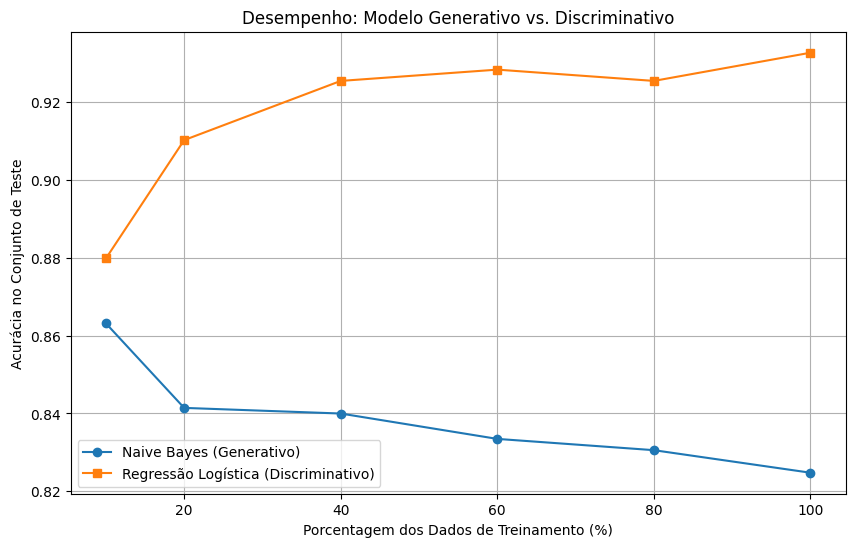

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tamanhos de conjunto de treinamento
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
nb_scores = []
lr_scores = []

for size in train_sizes:
    # Seleciona subset dos dados de treinamento
    subset_size = int(len(X_train) * size)
    X_subset = X_train.iloc[:subset_size]
    y_subset = y_train.iloc[:subset_size]

    # Treina modelos
    nb = GaussianNB().fit(X_subset, y_subset)
    lr = LogisticRegression(max_iter=10000).fit(X_subset, y_subset)

    # Avalia modelos
    nb_scores.append(accuracy_score(y_test, nb.predict(X_test)))
    lr_scores.append(accuracy_score(y_test, lr.predict(X_test)))

# Visualiza resultados
plt.figure(figsize=(10, 6))
plt.plot([size*100 for size in train_sizes], nb_scores, 'o-', label='Naive Bayes (Generativo)')
plt.plot([size*100 for size in train_sizes], lr_scores, 's-', label='Regressão Logística (Discriminativo)')
plt.xlabel('Porcentagem dos Dados de Treinamento (%)')
plt.ylabel('Acurácia no Conjunto de Teste')
plt.title('Desempenho: Modelo Generativo vs. Discriminativo')
plt.legend()
plt.grid(True)

6. Análise de Características

In [ ]:
# Analisar quais características são mais relevantes para cada modelo
import pandas as pd

# Top 10 características para Regressão Logística
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])
}).sort_values('Importance', ascending=False)

top_10_lr = feature_importance.head(10)

# Para Naive Bayes, podemos olhar para a diferença nas médias
nb_means_diff = pd.DataFrame({
    'Feature': X.columns,
    'Difference': np.abs(nb_model.theta_[0] - nb_model.theta_[1])
}).sort_values('Difference', ascending=False)

top_10_nb = nb_means_diff.head(10)

## Exercício

###Perguntas para Discussão:

1. Qual modelo teve melhor desempenho geral? Por quê?
2. Como o tamanho do conjunto de dados afetou cada modelo?
3. Qual modelo treinou mais rápido? Por que isso importa em aplicações reais?
4. Os modelos deram importância às mesmas características?
5. Quais características você tentaria remover para tornar o modelo mais eficiente?
6. Em quais situações você escolheria um modelo generativo em vez de um discriminativo?